In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

## Data aquasisition and pre process

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train.shape,X_test.shape,y_train.shape,y_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [3]:
def plot_input_img(i):
  plt.imshow(X_train[i],cmap='binary')
  plt.title(y_train[i])
  plt.show()

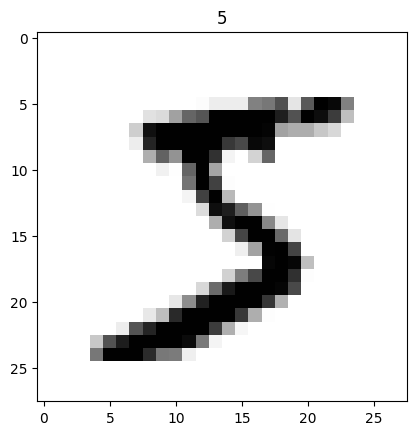

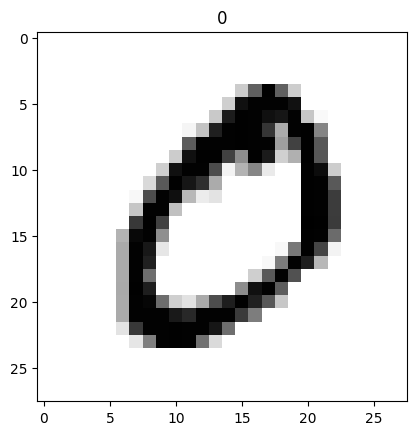

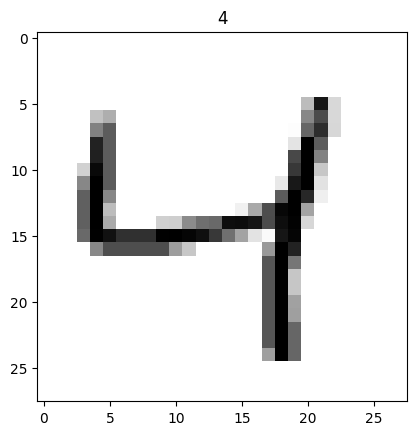

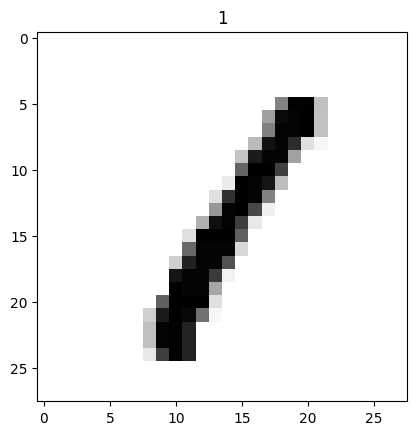

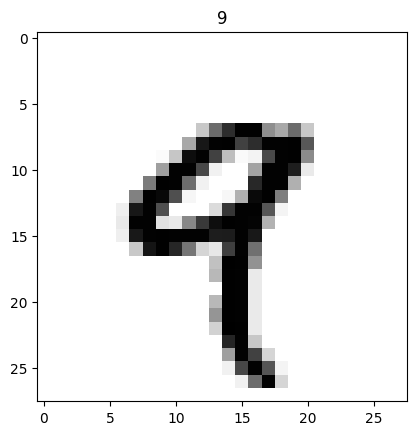

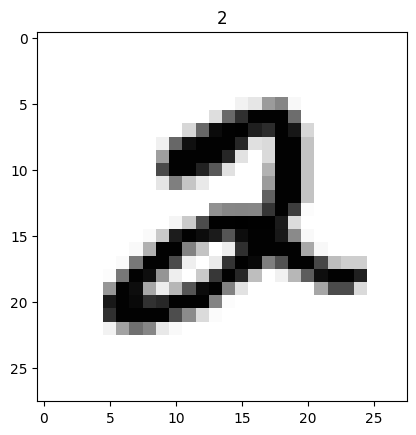

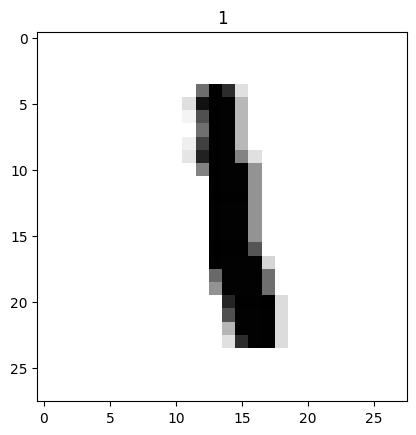

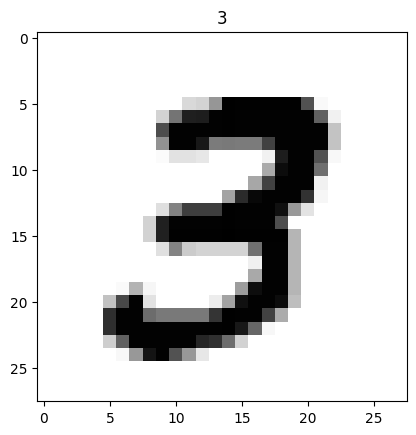

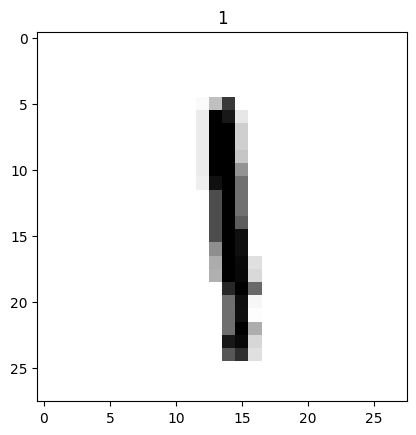

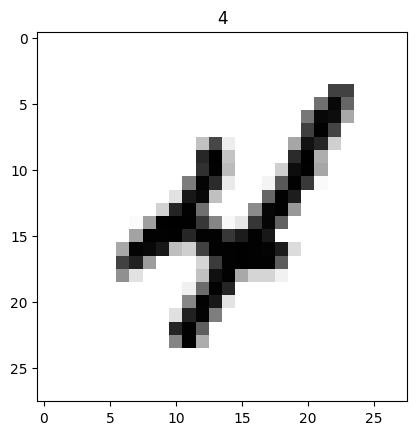

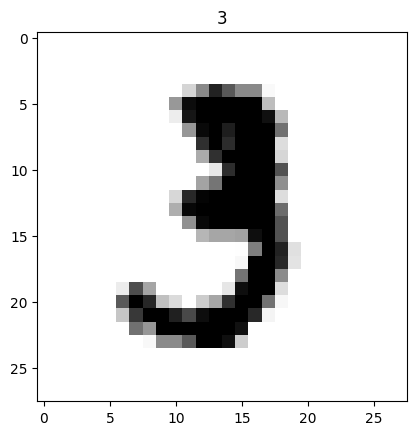

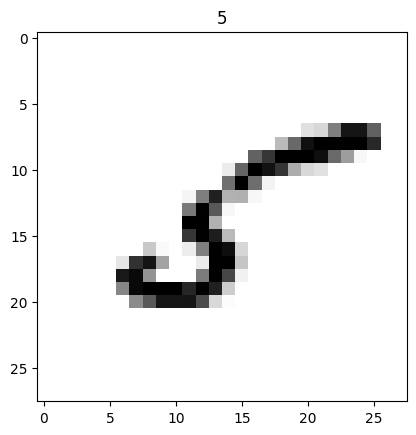

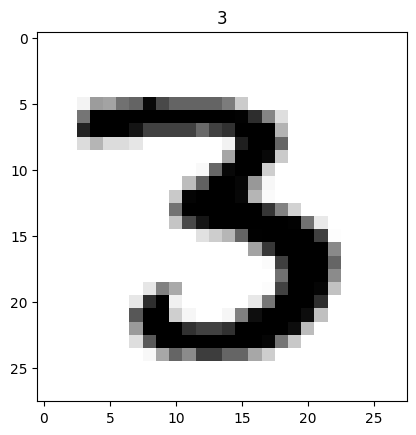

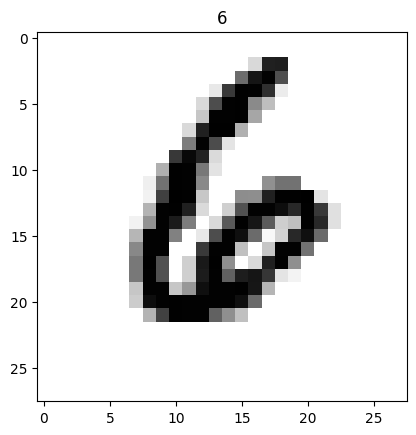

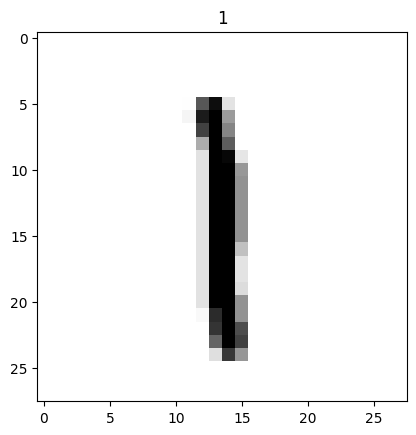

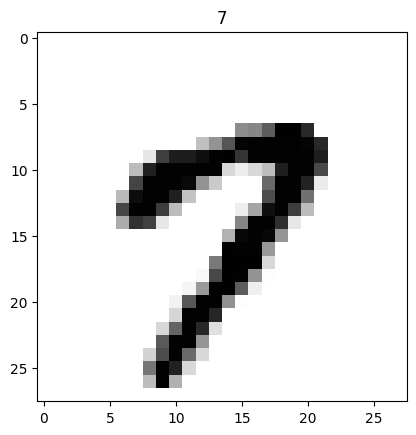

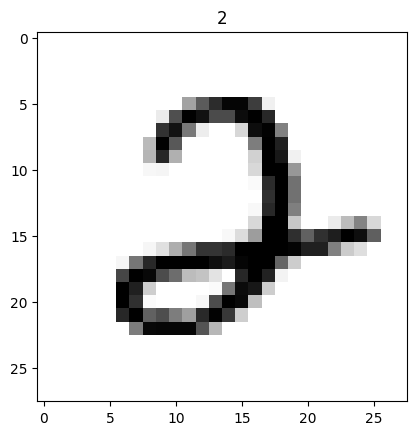

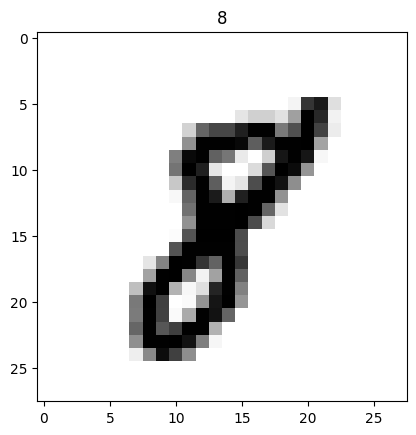

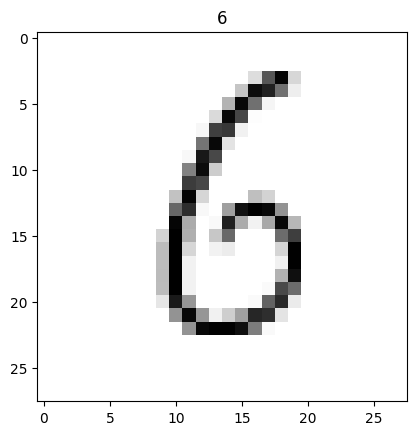

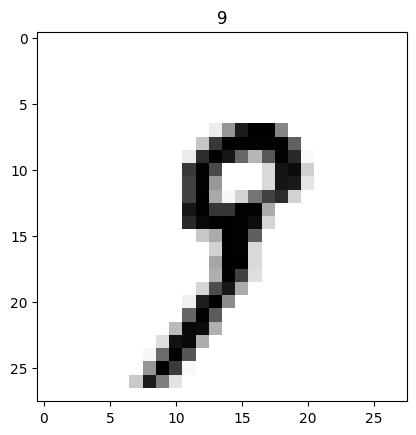

In [4]:
for i in range(20):
  plot_input_img(i)

## preprecessing

In [5]:
X_train=X_train.astype(np.float32)/255 # to normalize
X_test=X_test.astype(np.float32)/255 # to normalize

#reshape expand dimention of images to (28,28,1)
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

In [6]:
X_train.shape

(60000, 28, 28, 1)

In [7]:
#changing response varible y to one hot vectors
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [8]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## model building

In [9]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dropout(0.25)) #to prevent over fitting

model.add(Dense(10,activation="softmax")) #classification layer for multiclasses

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [11]:
model.compile(optimizer="adam",loss=keras.losses.categorical_crossentropy,metrics="accuracy")

In [12]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

# Define file path in Google Drive
filepath = '/content/drive/My Drive/bestmodel.h5'

Mounted at /content/drive


In [13]:
#callbacks
from keras.callbacks import EarlyStopping,ModelCheckpoint

#Earlystopping
es=EarlyStopping(monitor='val_accuracy',min_delta=0.0001,patience=5,verbose=1)

#model checkpoint
mc=ModelCheckpoint(filepath=filepath,monitor="val_accuracy",verbose=1,save_best_only=True)

cb=[es,mc]

## model training

In [14]:
his=model.fit(X_train,y_train,epochs=50,validation_split=0.3,callbacks=cb)

Epoch 1/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.2183 - accuracy: 0.9332
Epoch 1: val_accuracy improved from -inf to 0.97656, saving model to /content/drive/My Drive/bestmodel.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1313/1313 [==============================] - 42s 31ms/step - loss: 0.2183 - accuracy: 0.9332 - val_loss: 0.0785 - val_accuracy: 0.9766
Epoch 2/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0727 - accuracy: 0.9777
Epoch 2: val_accuracy improved from 0.97656 to 0.98283, saving model to /content/drive/My Drive/bestmodel.h5
1313/1313 [==============================] - 41s 32ms/step - loss: 0.0727 - accuracy: 0.9777 - val_loss: 0.0575 - val_accuracy: 0.9828
Epoch 3/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0557 - accuracy: 0.9830
Epoch 3: val_accuracy improved from 0.98283 to 0.98472, saving model to /content/drive/My Drive/bestmodel.h5
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0557 - accuracy: 0.9830 - val_loss: 0.0481 - val_accuracy: 0.9847
Epoch 4/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0451 - accuracy: 0.9860
Epoch 4: val_accuracy improved from 0.98472 to 0.98511, saving model to /content/dr

In [15]:
model_S=keras.models.load_model(filepath)

In [16]:
score=model_S.evaluate(X_test,y_test)
score

313/313 [==============================] - 3s 9ms/step - loss: 0.0323 - accuracy: 0.9910


[0.03230833262205124, 0.9909999966621399]

In [17]:
y_pred=model.predict(X_test)

313/313 [==============================] - 6s 18ms/step


In [18]:
y_pred

array([[1.1351861e-15, 6.4078678e-19, 4.4574550e-10, ..., 9.9999994e-01,
        1.8718181e-13, 4.4339160e-10],
       [4.3060791e-11, 1.3504894e-10, 9.9999994e-01, ..., 9.5103223e-20,
        1.7694803e-12, 7.8939198e-16],
       [2.0266484e-09, 9.9995369e-01, 3.9089880e-08, ..., 3.7744221e-06,
        1.2807335e-06, 8.2078672e-10],
       ...,
       [3.7031393e-23, 6.4164599e-17, 5.6404186e-21, ..., 9.0419395e-15,
        3.4249433e-11, 6.6230458e-13],
       [1.3782795e-13, 1.6052267e-18, 1.5875977e-17, ..., 1.7819497e-17,
        7.1218280e-09, 1.2813385e-12],
       [1.8642366e-12, 9.0487094e-17, 1.5921419e-11, ..., 5.1791978e-17,
        6.0044365e-09, 2.9820534e-13]], dtype=float32)

In [20]:
# Convert predicted probabilities to class labels
y_pred_max = np.argmax(y_pred, axis=1)
y_pred_max

array([7, 2, 1, ..., 4, 5, 6])

In [22]:
y_pred_max1 = np.argmax(y_test, axis=1)
y_pred_max1

array([7, 2, 1, ..., 4, 5, 6])

In [23]:
from sklearn.metrics import classification_report

report = classification_report(y_pred_max1, y_pred_max)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

